# Keywords and Document Classification

## Intro

The identification of word relevance as well as the classification of text documents, is mostly made by analyzing the frequency of words in each document. This is an unsupervised methodology that can be used to retrieve a profile of a sentence or documents and then use this profile to measure the distance between other sentences or documents. For this, several procedures can be applied, such as the Bag of Words matrix (**TF matrix**) or the Term Frequency Inverse Document Frequency **(TF-IDF matrix)**. In this tutorial, you will find how to use sklearn function to compute each of the matrices and use them on text classification problems.

In [33]:
#Load main notebook libraries
from IPython.display import display

## Vectorizer

Sklearn has a set of functions that can be used to compute each of the the matrices, which are called: CountVectorizer and TFIDFVectorizer. Additionally, you can also find the HashingVectorizer, which is the CountVectorizer function without indexing based on the words, but rather by the index of words, reducing the size and memory, but the word association is lost.

Next is an example in how to use the countvectorizer and tfidf vectorizer in very simple exercises.

## Load Text Dataset

In [68]:
#Loading a dataset
categories = ['alt.atheism', 'soc.religion.christian', "comp.graphics"]
from sklearn.datasets import fetch_20newsgroups

train_dataset = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

print(train_dataset.target_names)
print(train_dataset.target[:10])

['alt.atheism', 'comp.graphics', 'soc.religion.christian']
[0 2 2 0 1 1 2 1 1 0]


#### Example of Text from the dataset for class 0 and 1

In [69]:
#Example of dataset 1, which was splitted into sentences 
print(train_dataset.data[0].split("\n")[:20])

['From: chrisb@tafe.sa.edu.au (Chris BELL)', "Subject: Re: Don't more innocents die without the death penalty?", 'Organization: South Australian Regional Academic and Research Network', 'Lines: 19', 'Distribution: world', 'NNTP-Posting-Host: baarnie.tafe.sa.edu.au', '', '"James F. Tims" <p00168@psilink.com> writes:', '', '>By maintaining classes D and E, even in prison, it seems as if we ', '>place more innocent people at a higher risk of an unjust death than ', '>we would if the state executed classes D and E with an occasional error.', '', 'I would rather be at a higher risk of being killed than actually killed by', '                              ^^^^                      ^^^^^^^^', 'mistake.  Though I do agree with the concept that the type D and E murderers', "are a massive waste of space and resources I don't agree with the concept:", '', '\tkilling is wrong', '\tif you kill we will punish you']


In [71]:
#Example of dataset 2, which was splitted into sentences 
print(train_dataset.data[4].split("\n")[:20])

['From: bolson@carson.u.washington.edu (Edward Bolson)', 'Subject: Sphere from 4 points?', 'Organization: University of Washington, Seattle', 'Lines: 18', 'Distribution: world', 'NNTP-Posting-Host: carson.u.washington.edu', '', 'Boy, this will be embarassing if it is trivial or an FAQ:', '', 'Given 4 points (non coplanar), how does one find the sphere, that is,', 'center and radius, exactly fitting those points?  I know how to do it', 'for a circle (from 3 points), but do not immediately see a ', 'straightforward way to do it in 3-D.  I have checked some', 'geometry books, Graphics Gems, and Farin, but am still at a loss?', 'Please have mercy on me and provide the solution?  ', '', 'Thanks,', 'Ed', '', '']


## Convert text to vector

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### CountVectorizer

The countvectorizer function can be used to create a matrix with the frequency of words in the text documents. It accepts an array/list/dataframe of strings. Several input parameters are required for this vectorizer, which are listed as follows:

* ___stop_words___: list of words to exclude from the matrix. This is a typical pre-processing step in text analysis, since the several words that are too common in certain languages can bias the classification process. For this, words (e.g in english) such as "to", "the", "a", etc... are removed from the matrix since these do not contribute for the differenciation between classes;

* ___token_pattern___: usage of capturing groups in the dataset. Find if the presence of the text pattern searched is found in the text document;

* ___ngram_range___: the lower and upper boundary of the range of n-values for different word or char n-grams. This process adds columns to the matrix by finding sequences of words. This can be very relevant in some applications, since it bring context to words and not only their count;

* ___analyzer___: If the analysis is to be made on the word level or the char level;

* ___max_df___: document frequencies higher than this value will be discarded;

* ___min_df___: document frequencies lower than this value will be discarded;

* ___max_features___: maximum number of columns in the matrix, ordered by term frequency;

* ___vocabulary___: can input a vocabulary with the terms that want to be counted;

* ___binary___: everything with more than 0 counts is 1, while the rest remains 0;

In [49]:
import pandas as pd

#Example:
corpus = [
    'This is the first document.',
    'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

#For matrix representation as dataframe
vector_X = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())

print(vectorizer.vocabulary_)
print("")
display(vector_X)

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}



,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [50]:
#Example setting is as stop_word
vectorizer = CountVectorizer(stop_words=["is"])
X = vectorizer.fit_transform(corpus)

#For matrix representation as dataframe
vector_X = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())

print(vectorizer.vocabulary_)
print("")
display(vector_X)

{'this': 7, 'the': 5, 'first': 2, 'document': 1, 'second': 4, 'and': 0, 'third': 6, 'one': 3}



,and,document,first,one,second,the,third,this
0,0,1,1,0,0,1,0,1
1,0,2,0,0,1,1,0,1
2,1,0,0,1,0,1,1,1
3,0,1,1,0,0,1,0,1


In [51]:
#Example using n-gram
vectorizer = CountVectorizer(stop_words=["is", "the"], ngram_range=(1,3))
X = vectorizer.fit_transform(corpus)

#For matrix representation as dataframe
vector_X = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())

print(vectorizer.vocabulary_)
print("")
display(vector_X)

{'this': 13, 'first': 6, 'document': 3, 'this first': 16, 'first document': 7, 'this first document': 17, 'second': 9, 'this document': 14, 'document second': 4, 'second document': 10, 'this document second': 15, 'document second document': 5, 'and': 0, 'third': 11, 'one': 8, 'and this': 1, 'this third': 18, 'third one': 12, 'and this third': 2, 'this third one': 19}



,and,and this,and this third,document,document second,document second document,first,first document,one,second,second document,third,third one,this,this document,this document second,this first,this first document,this third,this third one
0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0
1,0,0,0,2,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0
2,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1
3,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0


In [52]:
#Example using analyzer char
vectorizer = CountVectorizer(stop_words=["is", "the", " "], ngram_range=(1,3), analyzer="char")
X = vectorizer.fit_transform(corpus)

#For matrix representation as dataframe
vector_X = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())

print(vectorizer.vocabulary_)
print("")
display(vector_X)

{'t': 87, 'h': 43, 'i': 49, 's': 78, ' ': 0, 'e': 30, 'f': 40, 'r': 73, 'd': 23, 'o': 67, 'c': 18, 'u': 96, 'm': 55, 'n': 58, '.': 13, 'th': 93, 'hi': 46, 'is': 53, 's ': 79, ' i': 5, ' t': 11, 'he': 44, 'e ': 31, ' f': 3, 'fi': 41, 'ir': 50, 'rs': 76, 'st': 85, 't ': 88, ' d': 1, 'do': 28, 'oc': 68, 'cu': 21, 'um': 97, 'me': 56, 'en': 38, 'nt': 63, 't.': 91, 'thi': 95, 'his': 48, 'is ': 54, 's i': 81, ' is': 6, 's t': 82, ' th': 12, 'the': 94, 'he ': 45, 'e f': 32, ' fi': 4, 'fir': 42, 'irs': 52, 'rst': 77, 'st ': 86, 't d': 89, ' do': 2, 'doc': 29, 'ocu': 69, 'cum': 22, 'ume': 98, 'men': 57, 'ent': 39, 'nt.': 65, ' s': 9, 'se': 83, 'ec': 36, 'co': 19, 'on': 70, 'nd': 59, 'd ': 24, 's d': 80, 'nt ': 64, 't i': 90, 'e s': 33, ' se': 10, 'sec': 84, 'eco': 37, 'con': 20, 'ond': 71, 'nd ': 60, 'd d': 25, 'a': 15, 'an': 16, 'rd': 74, ' o': 7, 'ne': 61, 'e.': 35, 'and': 17, 'd t': 27, 'e t': 34, 'hir': 47, 'ird': 51, 'rd ': 75, 'd o': 26, ' on': 8, 'one': 72, 'ne.': 62, '?': 14, 't?': 92, '

,,d,do,f,fi,i,is,o,on,s,...,t d,t i,t.,t?,th,the,thi,u,um,ume
0,4,1,1,1,1,1,1,0,0,0,...,1,0,1,0,2,1,1,1,1,1
1,5,2,2,0,0,1,1,0,0,1,...,0,1,1,0,2,1,1,2,2,2
2,5,0,0,0,0,1,1,1,1,0,...,0,0,0,0,3,1,2,0,0,0
3,4,1,1,1,1,0,0,0,0,0,...,1,0,0,1,2,1,1,1,1,1


### TF-IDF vectorizer

The Tfidfvectorizer function can be used to create a matrix with the frequency of words based on the inverse frequency of their occurrences in documents. This vectorization process is typically used in cases where the relevance of words has to be made by means of the documents appearance, giving more importance to words that occur in less documents than words that occur in more documents. This is a very distinctive process than what happens in countervectorizer, since there is no difference in relevance on document frequency. Such as countervectorizer, it accepts an array/list/dataframe of strings. Several input parameters are required for this vectorizer, which are listed as follows:

* ___stop_words___: list of words to exclude from the matrix. This is a typical pre-processing step in text analysis, since the several words that are too common in certain languages can bias the classification process. For this, words (e.g in english) such as "to", "the", "a", etc... are removed from the matrix since these do not contribute for the differenciation between classes;

* ___token_pattern___: usage of capturing groups in the dataset. Find if the presence of the text pattern searched is found in the text document;

* ___ngram_range___: the lower and upper boundary of the range of n-values for different word or char n-grams. This process adds columns to the matrix by finding sequences of words. This can be very relevant in some applications, since it bring context to words and not only their count;

* ___analyzer___: If the analysis is to be made on the word level or the char level;

* ___max_df___: document frequencies higher than this value will be discarded;

* ___min_df___: document frequencies lower than this value will be discarded;

* ___max_features___: maximum number of columns in the matrix, ordered by term frequency;

* ___vocabulary___: can input a vocabulary with the terms that want to be counted;

* ___binary___: everything with more than 0 counts is 1, while the rest remains 0. This is only applicable for the term frequency count;

* ___norm___: normalization process, if l1: sum of absolute values of vector is 1, if l2: sum of squares of vector elements is 1;

* ___use_idf___: inverse document frequency reweighting;

* ___smooth_idf___: term to prevent zero divisions by adding 1 to document frequencies, as if an extra document was seen containing every term in the collection.


In [53]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

#For matrix representation as dataframe
vector_X = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())

print(vectorizer.vocabulary_)
print("")
display(vector_X)

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}



,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [55]:
#Example setting is as stop_word
vectorizer = TfidfVectorizer(stop_words=["is"])
X = vectorizer.fit_transform(corpus)

#For matrix representation as dataframe
vector_X = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())

print(vectorizer.vocabulary_)
print("")
display(vector_X)

{'this': 7, 'the': 5, 'first': 2, 'document': 1, 'second': 4, 'and': 0, 'third': 6, 'one': 3}



,and,document,first,one,second,the,third,this
0,0.000000,0.508819,0.628493,0.000000,0.000000,0.415993,0.000000,0.415993
1,0.000000,0.716512,0.000000,0.000000,0.561277,0.292898,0.000000,0.292898
2,0.531146,0.000000,0.000000,0.531146,0.000000,0.277174,0.531146,0.277174
3,0.000000,0.508819,0.628493,0.000000,0.000000,0.415993,0.000000,0.415993


In [64]:
#Example setting is an ngram range of 3
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X = vectorizer.fit_transform(corpus)

#For matrix representation as dataframe
vector_X = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())

print(vectorizer.vocabulary_)
print("")
display(vector_X)

{'this': 27, 'is': 8, 'the': 18, 'first': 6, 'document': 3, 'this is': 30, 'is the': 9, 'the first': 19, 'first document': 7, 'this is the': 31, 'is the first': 10, 'the first document': 20, 'second': 16, 'this document': 28, 'document is': 4, 'the second': 21, 'second document': 17, 'this document is': 29, 'document is the': 5, 'is the second': 11, 'the second document': 22, 'and': 0, 'third': 25, 'one': 15, 'and this': 1, 'the third': 23, 'third one': 26, 'and this is': 2, 'is the third': 12, 'the third one': 24, 'is this': 13, 'this the': 32, 'is this the': 14, 'this the first': 33}



,and,and this,and this is,document,document is,document is the,first,first document,is,is the,...,the third one,third,third one,this,this document,this document is,this is,this is the,this the,this the first
0,0.000000,0.000000,0.000000,0.253071,0.000000,0.000000,0.312593,0.312593,0.206902,0.253071,...,0.000000,0.000000,0.000000,0.206902,0.000000,0.000000,0.312593,0.312593,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.370778,0.290447,0.290447,0.000000,0.000000,0.151567,0.185389,...,0.000000,0.000000,0.000000,0.151567,0.290447,0.290447,0.000000,0.000000,0.000000,0.000000
2,0.295301,0.295301,0.295301,0.000000,0.000000,0.000000,0.000000,0.000000,0.154100,0.188487,...,0.295301,0.295301,0.295301,0.154100,0.000000,0.000000,0.232819,0.232819,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.229862,0.000000,0.000000,0.283926,0.283926,0.187928,0.000000,...,0.000000,0.000000,0.000000,0.187928,0.000000,0.000000,0.000000,0.000000,0.360124,0.360124


In [60]:
#Example setting idf false
vectorizer = TfidfVectorizer(stop_words=["is"], use_idf=False)
X = vectorizer.fit_transform(corpus)

#For matrix representation as dataframe
vector_X = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())

print(vectorizer.vocabulary_)
print("")
display(vector_X)

{'this': 7, 'the': 5, 'first': 2, 'document': 1, 'second': 4, 'and': 0, 'third': 6, 'one': 3}



,and,document,first,one,second,the,third,this
0,0.000000,0.500000,0.5,0.000000,0.000000,0.500000,0.000000,0.500000
1,0.000000,0.755929,0.0,0.000000,0.377964,0.377964,0.000000,0.377964
2,0.447214,0.000000,0.0,0.447214,0.000000,0.447214,0.447214,0.447214
3,0.000000,0.500000,0.5,0.000000,0.000000,0.500000,0.000000,0.500000


In [63]:
#Example setting l1 and l2 norm
vectorizer = TfidfVectorizer(stop_words=["is"], norm="l1")
vectorizer2 = TfidfVectorizer(stop_words=["is"], norm="l2")

X = vectorizer.fit_transform(corpus)
X2 = vectorizer2.fit_transform(corpus)

#For matrix representation as dataframe
vector_X = pd.DataFrame(X.toarray(),columns= vectorizer.get_feature_names())
vector_X2 = pd.DataFrame(X2.toarray(),columns= vectorizer2.get_feature_names())

print(vectorizer.vocabulary_)
print("")
display(vector_X)
print("")
display(vector_X2)

{'this': 7, 'the': 5, 'first': 2, 'document': 1, 'second': 4, 'and': 0, 'third': 6, 'one': 3}



,and,document,first,one,second,the,third,this
0,0.000000,0.258376,0.319146,0.000000,0.000000,0.211239,0.000000,0.211239
1,0.000000,0.384480,0.000000,0.000000,0.301181,0.157169,0.000000,0.157169
2,0.247299,0.000000,0.000000,0.247299,0.000000,0.129051,0.247299,0.129051
3,0.000000,0.258376,0.319146,0.000000,0.000000,0.211239,0.000000,0.211239


,and,document,first,one,second,the,third,this
0,0.000000,0.508819,0.628493,0.000000,0.000000,0.415993,0.000000,0.415993
1,0.000000,0.716512,0.000000,0.000000,0.561277,0.292898,0.000000,0.292898
2,0.531146,0.000000,0.000000,0.531146,0.000000,0.277174,0.531146,0.277174
3,0.000000,0.508819,0.628493,0.000000,0.000000,0.415993,0.000000,0.415993


## Use Vectorizer for Text Classification

#### Create vectorizer from dataset exported

In [81]:
train_vec = TfidfVectorizer()
train_tfidf = train_vec.fit_transform(train_dataset.data)
train_tfidf.shape

(1663, 27829)

#### Use a classifier to train and test the matrix

In [82]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_tfidf, train_dataset.target)

#### Predict class based on sentence

In [86]:
example_sentences = ["I am a priest from the angelical church", "My GPU has 8 GB of RAM and it is super fast"]
#transform text to vector
example_vec = train_vec.transform(example_sentences)
#predict class of vec
predicted = clf.predict(example_vec)

print(example_sentences[0] + " | class :")
print(train_dataset.target_names[predicted[0]])

print(example_sentences[1] + " | class :")
print(train_dataset.target_names[predicted[1]])

I am a priest from the angelical church | class :
soc.religion.christian
My GPU has 8 GB of RAM and it is super fast | class :
comp.graphics


#### Test on complete dataset based on TFIDF

In [141]:
import numpy as np

test_dataset = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = test_dataset.data
test_vec = train_vec.transform(docs_test)
predicted = clf.predict(test_vec)

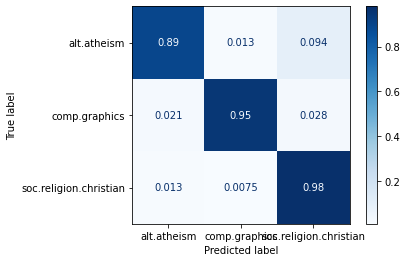

In [142]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf, test_vec, test_dataset.target,
                                 display_labels=test_dataset.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize="true")

#### Test on complete dataset countvectorizer

In [240]:
train_vec = CountVectorizer(ngram_range=(1,2), stop_words=["are", "he", "the", "of", "to", "is", "you", "which","for", "and", "that", "it", "in", "this", "was", "be"])
train_tfidf = train_vec.fit_transform(train_dataset.data)

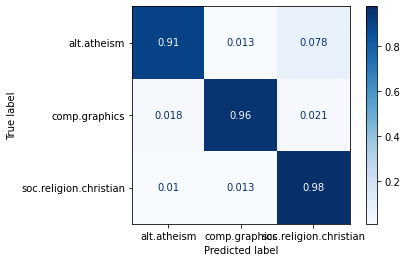

In [241]:
clf = MultinomialNB().fit(train_tfidf, train_dataset.target)
test_vec = train_vec.transform(docs_test)
predicted = clf.predict(test_vec)
plot_confusion_matrix(clf, test_vec, test_dataset.target,
                                 display_labels=test_dataset.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize="true")

## Use Vectorizer for Keyword extraction

In [252]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

doc = np.array(test_dataset.data)[np.where(test_dataset.target==2)[0]]
doc_vec = train_vec.transform(doc)

feature_names=train_vec.get_feature_names()
sorted_items=sort_coo(doc_vec.tocoo())
keywords=extract_topn_from_vector(feature_names, sorted_items,10)

In [253]:
# now print the results
print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])


===Keywords===
god 48
his 67
as 58
who 56
not 48
on 52
homosexuality 52
love 50
